In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [425]:
data = pd.read_csv('housing-2.data.csv', delimiter='\\s+')

In [426]:
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [427]:
data.shape

(506, 14)

<Axes: >

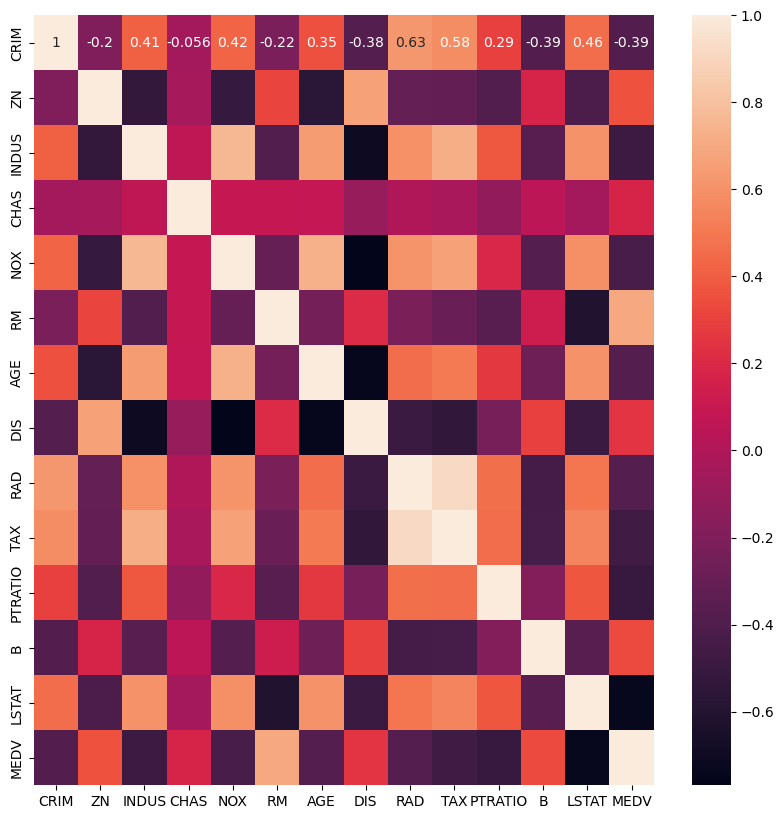

In [428]:
plt.figure(figsize=(10,10))
sns.heatmap(annot=True, data=data.corr())

In [429]:
boston_x = data[['RM']]
boston_y = data[['MEDV']]

print(boston_y)
print(boston_x.shape)

     MEDV
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
..    ...
501  22.4
502  20.6
503  23.9
504  22.0
505  11.9

[506 rows x 1 columns]
(506, 1)


In [430]:
from sklearn.model_selection import train_test_split

In [431]:
train_X, test_X, train_Y, test_Y = train_test_split(boston_x, boston_y, test_size=0.2, shuffle=True)
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
# print(test_Y)

(404, 1)
(404, 1)
(102, 1)


In [432]:
from sklearn import linear_model
linReg = linear_model.LinearRegression()

In [433]:
linReg.fit(train_X, train_Y)

LinearRegression()

In [434]:
print(linReg.intercept_)
print(linReg.coef_)

[-31.64764661]
[[8.63028662]]


In [435]:
predict_Y = linReg.predict(test_X)

In [436]:
from sklearn.metrics import mean_squared_error

In [437]:
print('Mean squared error:', mean_squared_error(test_Y, predict_Y))

Mean squared error: 40.77456936697746


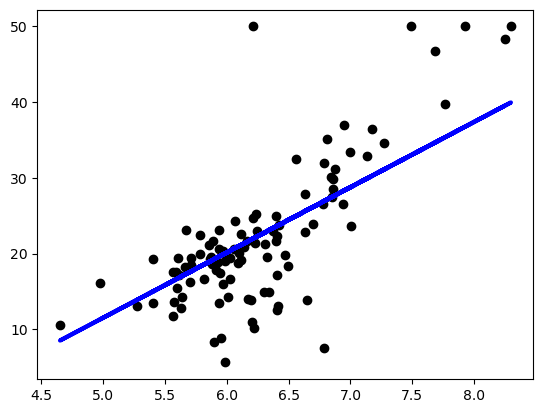

In [438]:
plt.scatter(test_X, test_Y, color='black')
plt.plot(test_X, predict_Y, color='blue', linewidth=3)

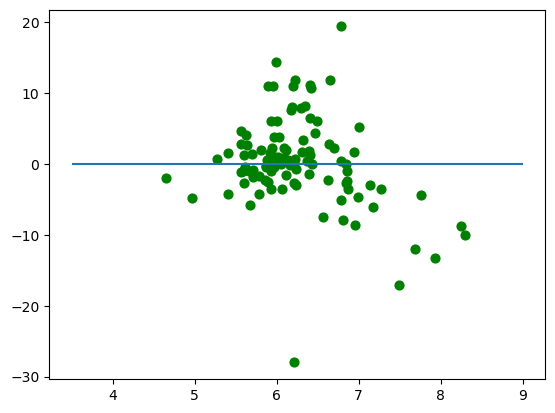

In [439]:
plt.scatter(test_X, linReg.predict(test_X) - test_Y, c='g', s=40)
plt.hlines(y=0, xmin=3.5, xmax=9)

In [440]:
multi_X = data.drop('MEDV', axis=1)
multi_Y = data[['MEDV']]

In [441]:
print(multi_X.shape)
print(multi_Y.shape)

(506, 13)
(506, 1)


In [442]:
train_multi_X, test_multi_X, train_multi_Y, test_multi_Y = train_test_split(multi_X, multi_Y, test_size=0.2, shuffle=True)

In [443]:
multi_linReg = linear_model.LinearRegression()
history = multi_linReg.fit(train_multi_X, train_multi_Y)

In [444]:
print(history.coef_)
print(history.intercept_)

[[-1.34904106e-01  4.14695861e-02 -7.07340946e-03  2.90879164e+00
  -1.93570601e+01  3.66948950e+00  1.88674211e-03 -1.66313821e+00
   3.42754357e-01 -1.26184790e-02 -1.03301485e+00  9.13296727e-03
  -5.50963551e-01]]
[41.00771878]


In [445]:
predict_multi_Y = multi_linReg.predict(test_multi_X)

In [446]:
print('Multi MSE', mean_squared_error(test_multi_Y, predict_multi_Y))


Multi MSE 14.54395300744207
